In [1]:
import os

main_dir = "/raid/varsha/data/train_val2019/"
path_128 = "/home/test/varsha/images/generated_samples_128_128_Lanczos"
path_64 = "/home/test/varsha/images/generated_samples_64_64_Lanczos"

classes = os.listdir(main_dir)
ll = []
for c in classes:
    path = main_dir + "/" + c
    l = os.listdir(path)
    ll.append(l)

In [2]:
def find_class(num, ll):
    main_class = "None"
    for i in range(len(ll)):
        for j in range(len(ll[i])):
            if num in ll[i]:
                main_class = classes[i]

    return main_class

In [4]:
head_classes = [
    624,
    103,
    611,
    158,
    623,
    718,
    74,
    205,
    854,
    669,
    232,
    474,
    116,
    204,
    45,
    578,
    69,
    998,
    836,
    423,
    240,
    195,
    222,
    96,
    530,
    246,
    121,
    660,
    691,
    968,
    593,
    98,
]
tail_classes = [
    689,
    899,
    553,
    612,
    813,
    762,
    784,
    625,
    364,
    803,
    633,
    563,
    929,
    704,
    893,
    137,
    506,
    595,
    833,
    111,
    720,
    462,
    868,
    957,
    934,
    756,
    662,
    711,
    928,
    357,
    498,
    780,
]

**********
(800, 600, 3)
(128, 128, 3)
**********


/tmp/ipykernel_1262499/3349380908.py:38: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(132)


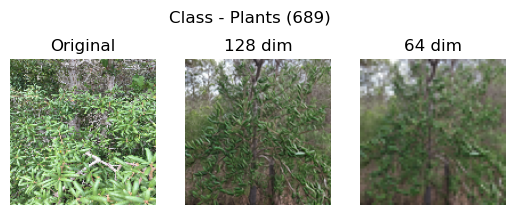

In [15]:
import matplotlib.pyplot as plt
import cv2
import glob, random

save_path = "/home/test/varsha/images/viz_tail"
os.makedirs(save_path, exist_ok=True)
for c in tail_classes[:1]:
    main_cls = find_class(str(c), ll)
    # print(main_cls)
    path_ = os.path.join(main_dir, main_cls, str(c))
    imgs = glob.glob("{}/*.jpg".format(path_))
    random.shuffle(imgs)
    # print(len(imgs))
    cls_dir_128 = os.path.join(path_128, main_cls, str(c))
    # print(cls_dir_128)
    img_gen_128 = glob.glob("{}/base/*.png".format(cls_dir_128))
    # print(len(img_gen_128))
    # random.shuffle(img_gen_128)
    cls_dir_64 = os.path.join(path_64, main_cls, str(c))
    img_gen_64 = glob.glob("{}/base/*.png".format(cls_dir_64))
    # print(len(img_gen_64))

    random.shuffle(img_gen_64)

    # plt.figure(figsize=(20, 20))  # specifying the overall grid size
    plt.figure()
    # for i in range(3):
    plt.subplot(5, 5, 2 + 1)  # the number of images in the grid is 5*5 (25)
    plt.axis("off")
    plt.subplot(131)
    plt.axis("off")
    plt.title("Original")
    plt.imshow(
        cv2.cvtColor(cv2.resize(cv2.imread(imgs[1]), (128, 128)), cv2.COLOR_BGR2RGB)
    )
    print("**********")
    print(cv2.imread(imgs[1]).shape)
    plt.subplot(132)
    plt.axis("off")
    plt.title("128 dim")

    plt.imshow(cv2.cvtColor((cv2.imread(img_gen_128[1])), cv2.COLOR_BGR2RGB))
    print(cv2.imread(img_gen_128[1]).shape)
    print("**********")

    plt.subplot(133)
    plt.axis("off")
    plt.title("64 dim")
    plt.suptitle("Class - {} ({})".format(main_cls, c), y=0.75)
    plt.imshow(cv2.cvtColor((cv2.imread(img_gen_64[1])), cv2.COLOR_BGR2RGB))

    plt.savefig("{}/{}.jpg".format(save_path, c), dpi=300)
    # plt.show()

In [ ]:
import matplotlib.pyplot as plt
import cv2
import glob, random

for c in head_classes:
    main_cls = find_class(str(c), ll)
    # print(main_cls)
    path_ = os.path.join(main_dir, main_cls, str(c))
    imgs = glob.glob("{}/*.jpg".format(path_))
    random.shuffle(imgs)
    print(cv2.imread(imgs[1]).shape)

In [13]:
import glob, img2pdf

with open("/home/test/varsha/head_classes.pdf", "wb") as f:
    f.write(
        img2pdf.convert(
            glob.glob("/home/test/varsha/images/viz_head/*.jpg"),
            rotation=img2pdf.Rotation.ifvalid,
        )
    )
    # with open("name.pdf","wb") as f:
# f.write(img2pdf.convert('test.jpg'), rotation=img2pdf.Rotation.ifvalid)